
# Bank Customer Analytics - Data Preparation for Machine Learning

This notebook demonstrates the step-by-step process of preparing the `bank_customer_analytics.csv` dataset for machine learning.


First few rows of the dataset:


,CustomerID,Age,Gender,MaritalStatus,Income,Savings,CreditScore,LoanAmount,LoanStatus,AccountType,YearsWithBank,Churn
0,C0001,25.0,FEMALE,single,80000.0,15000.0,600.0,50000.0,approved,joint,NaN,no
1,C0002,35.0,male,single,40000.0,5000.0,700.0,40000.0,approved,joint,10.0,no
2,C0003,35.0,female,single,100000.0,20000.0,800.0,50000.0,defaulted,checking,10.0,no
3,C0004,45.0,male,married,80000.0,20000.0,750.0,30000.0,approved,checking,NaN,no
4,C0005,45.0,male,married,40000.0,25000.0,750.0,20000.0,rejected,checking,2.0,yes



Summary Statistics:


,CustomerID,Age,Gender,MaritalStatus,Income,Savings,CreditScore,LoanAmount,LoanStatus,AccountType,YearsWithBank,Churn
count,3000,2838.000000,3000,3000,2865.000000,2854.000000,2857.000000,2867.000000,3000,3000,2713.000000,3000
unique,3000,NaN,4,4,NaN,NaN,NaN,NaN,3,4,NaN,2
top,C0001,NaN,female,single,NaN,NaN,NaN,NaN,approved,savings,NaN,no
freq,1,NaN,889,1216,NaN,NaN,NaN,NaN,1793,1236,NaN,2094
mean,NaN,39.048626,NaN,NaN,68293.193717,21483.882270,694.662233,34080.920823,NaN,NaN,6.883155,NaN
std,NaN,9.816456,NaN,NaN,19997.850070,20893.054327,68.907793,9972.978607,NaN,NaN,5.907284,NaN
min,NaN,25.000000,NaN,NaN,40000.000000,5000.000000,600.000000,20000.000000,NaN,NaN,1.000000,NaN
25%,NaN,35.000000,NaN,NaN,60000.000000,10000.000000,650.000000,30000.000000,NaN,NaN,2.000000,NaN
50%,NaN,35.000000,NaN,NaN,60000.000000,15000.000000,700.000000,30000.000000,NaN,NaN,5.000000,NaN
75%,NaN,45.000000,NaN,NaN,80000.000000,20000.000000,750.000000,40000.000000,NaN,NaN,10.000000,NaN



Missing Values:
CustomerID         0
Age              162
Gender             0
MaritalStatus      0
Income           135
Savings          146
CreditScore      143
LoanAmount       133
LoanStatus         0
AccountType        0
YearsWithBank    287
Churn              0
dtype: int64


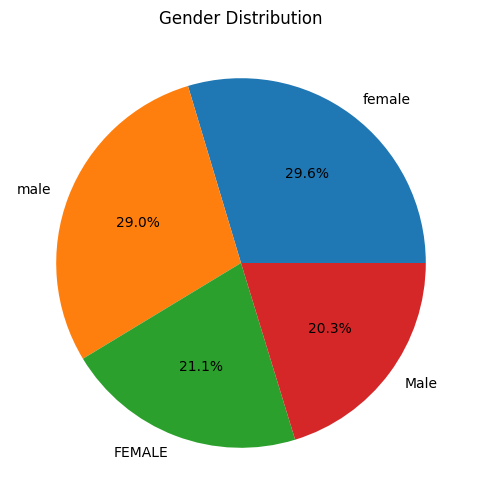

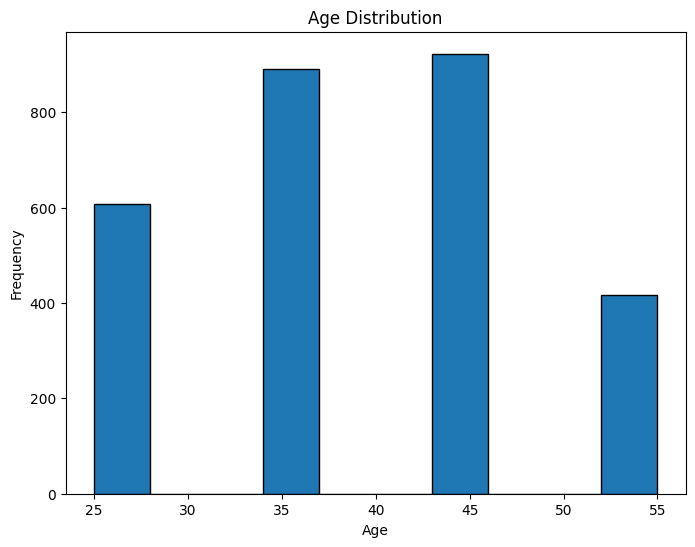

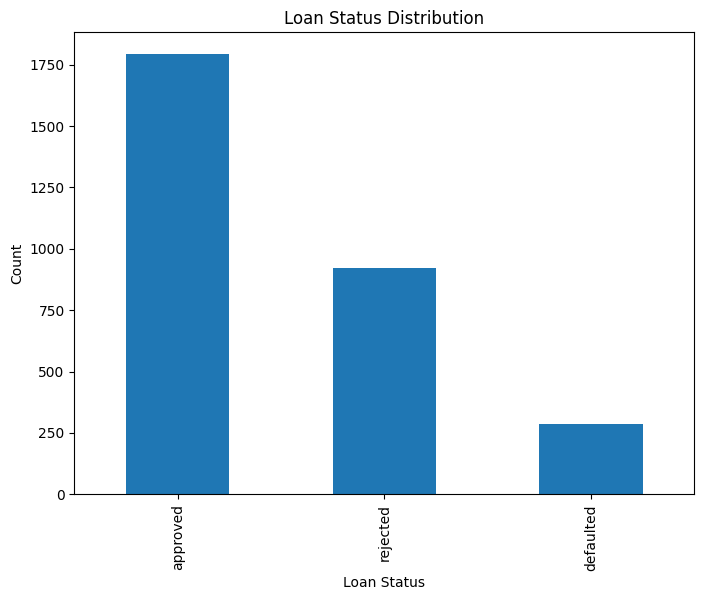

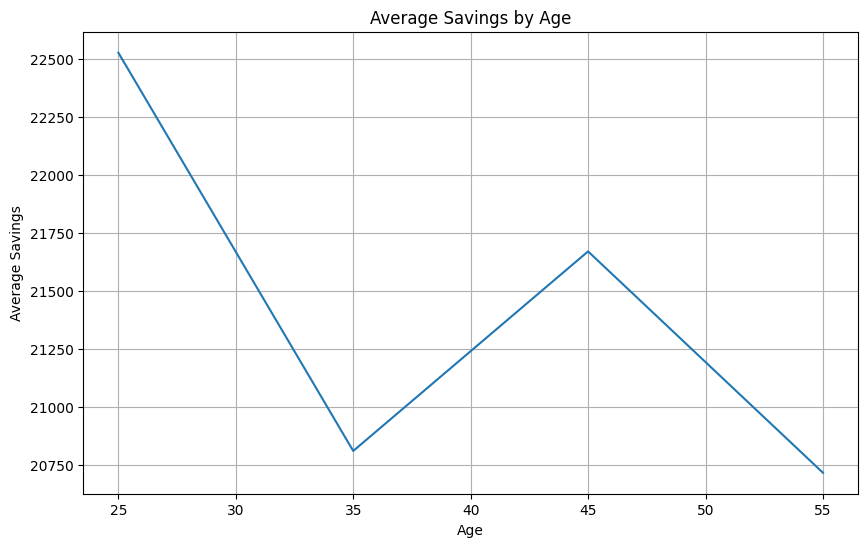

In [13]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Datasets/bank_customer_analytics.csv' 
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

# Summary statistics
print("\nSummary Statistics:")
display(data.describe(include='all'))

# Missing values check
missing_values = data.isna().sum()
print("\nMissing Values:")
print(missing_values)

# 1. Pie Chart: Gender Distribution
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', title="Gender Distribution")
plt.ylabel('')  # Remove default y-axis label
plt.show()

# 2. Histogram: Age Distribution
plt.figure(figsize=(8, 6))
data['Age'].plot(kind='hist', bins=10, title='Age Distribution', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3. Bar Plot: Loan Status Distribution
loan_status_counts = data['LoanStatus'].value_counts()
plt.figure(figsize=(8, 6))
loan_status_counts.plot(kind='bar', title="Loan Status Distribution")
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# 4. Line Plot: Average Savings by Age
avg_savings_by_age = data.groupby('Age')['Savings'].mean()
plt.figure(figsize=(10, 6))
avg_savings_by_age.plot(kind='line', title="Average Savings by Age")
plt.xlabel('Age')
plt.ylabel('Average Savings')
plt.grid()
plt.show()


Filled missing values in Age with its median: 35.0
Filled missing values in Income with its median: 60000.0
Filled missing values in Savings with its median: 15000.0
Filled missing values in CreditScore with its median: 700.0
Filled missing values in LoanAmount with its median: 30000.0
Filled missing values in YearsWithBank with its mean: 6.88

Missing Values After Handling:
CustomerID       0
Age              0
Gender           0
MaritalStatus    0
Income           0
Savings          0
CreditScore      0
LoanAmount       0
LoanStatus       0
AccountType      0
YearsWithBank    0
Churn            0
dtype: int64


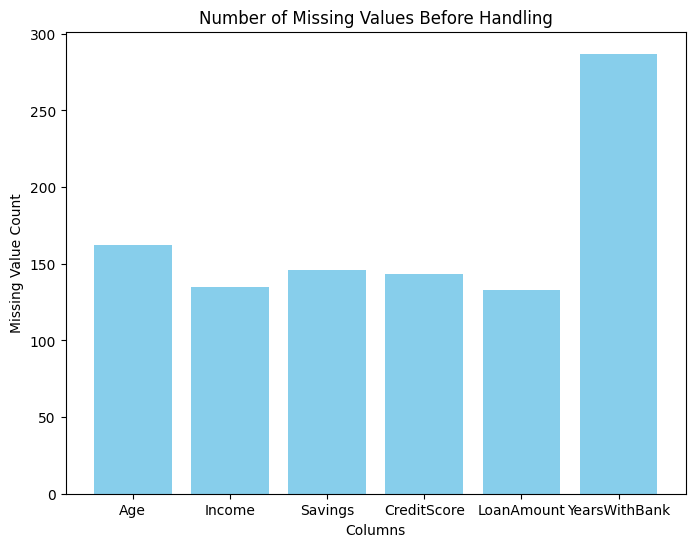

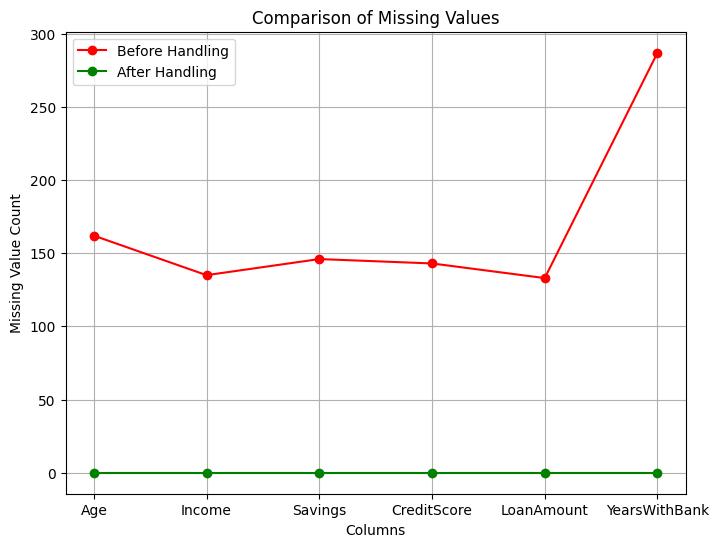

In [14]:

# Handling Missing Data

# Explanation:
# - Missing data can cause issues in analysis and modeling if not handled appropriately.
# - Here, we use strategies tailored to the nature of each column.

# Filling missing numerical values with the median:
# - Median is chosen for numerical columns as it is robust to outliers.
numerical_columns = ['Age', 'Income', 'Savings', 'CreditScore', 'LoanAmount']
for col in numerical_columns:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)
    print(f"Filled missing values in {col} with its median: {median_value}")

# Explanation:
# - 'Age': Median is used because age distribution may have outliers, and the median represents the central tendency.
# - 'Income', 'Savings', 'LoanAmount': Financial values often have outliers; median minimizes skewing effects.
# - 'CreditScore': Median ensures we don't distort the average creditworthiness.

# Filling missing values in 'YearsWithBank' with the mean:
# - Mean is used for 'YearsWithBank' as it reflects the average customer tenure.
mean_years = data['YearsWithBank'].mean()
data['YearsWithBank'] = data['YearsWithBank'].fillna(mean_years)
print(f"Filled missing values in YearsWithBank with its mean: {mean_years:.2f}")

# Explanation:
# - 'YearsWithBank': The mean provides an overall average tenure, which is suitable as it aligns with the column's interpretation.

# Verify no missing values remain
print("\nMissing Values After Handling:")
print(data.isna().sum())

# Visualization of Missing Data Handling
import matplotlib.pyplot as plt

# Bar Plot: Number of missing values before handling
plt.figure(figsize=(8, 6))
missing_counts = [162, 135, 146, 143, 133, 287]  # Original missing values
columns = ['Age', 'Income', 'Savings', 'CreditScore', 'LoanAmount', 'YearsWithBank']
plt.bar(columns, missing_counts, color='skyblue')
plt.title("Number of Missing Values Before Handling")
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.show()

# Line Plot: Comparison of missing values before and after handling
plt.figure(figsize=(8, 6))
missing_counts_after = [0] * len(columns)  # No missing values after handling
plt.plot(columns, missing_counts, label="Before Handling", marker='o', color='red')
plt.plot(columns, missing_counts_after, label="After Handling", marker='o', color='green')
plt.title("Comparison of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Missing Value Count")
plt.legend()
plt.grid()
plt.show()


In [15]:

# Feature Selection

# Encode the target variable 'Churn' as binary (0 for 'no', 1 for 'yes')
data['Churn'] = data['Churn'].map({'yes': 1, 'no': 0})

# Correlation with the target variable
numeric_data = data.select_dtypes(include=['number'])
correlations = numeric_data.corr()['Churn'].sort_values(ascending=False)
print("Correlations with Churn:")
print(correlations)

# Explanation:
# - Features with higher positive correlation with 'Churn' may have a strong relationship to customer attrition.
# - For example, 'CreditScore' (0.03) and 'YearsWithBank' (0.028) have the highest positive correlations.
# - Negative correlations (e.g., 'Income') suggest features where higher values are associated with customers staying.

# Retaining features:
# - 'CreditScore': Indicates financial reliability, which may impact churn likelihood.
# - 'YearsWithBank': Represents loyalty or tenure, often a factor in churn prediction.
# - 'Savings' and 'Income': Financial attributes that could influence customer behavior.
# - 'LoanAmount': Related to a customer’s debt, which might affect their relationship with the bank.
# - 'LoanStatus' and 'AccountType': Important categorical attributes reflecting customer interactions with the bank.
# - 'Churn': Target variable, retained for training.

# Selecting the final features for the model
selected_columns = ['CreditScore', 'YearsWithBank', 'Savings', 'Age', 
                    'Income', 'LoanAmount', 'LoanStatus', 'AccountType', 'Churn']
final_dataset = data[selected_columns]

# Explanation:
# - This set of features balances financial metrics, customer demographics, and account-level details.
# - It provides a mix of numerical and categorical data to improve model interpretability and performance.


Correlations with Churn:
Churn            1.000000
CreditScore      0.030831
YearsWithBank    0.028345
Savings          0.000764
LoanAmount      -0.005447
Age             -0.009083
Income          -0.012419
Name: Churn, dtype: float64


# Improved Data Visualizations and Feature Analysis

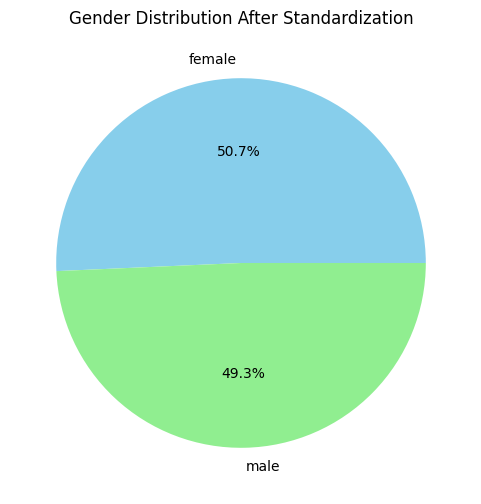

In [16]:
import pandas as pd
# Standardizing the Gender column by converting all values to lowercase
data['Gender'] = data['Gender'].str.lower()

# Re-generating the gender distribution pie chart after standardization
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution After Standardization')
plt.show()


This pie chart titled "Gender Distribution After Standardization" represents the gender breakdown of the customer data after standardizing the gender labels to lowercase. The two segments shown are:

female - 50.7%
male - 49.3%

After the standardization, the data reveals that the gender distribution is almost equal, with a slight majority of customers identifying as female (50.7%). The standardization step consolidated various forms of the gender labels ("FEMALE", "Male", etc.) into consistent categories ("female" and "male"), making the data more reliable for analysis. This uniformity is crucial for reducing errors in analysis and drawing accurate conclusions from the data.

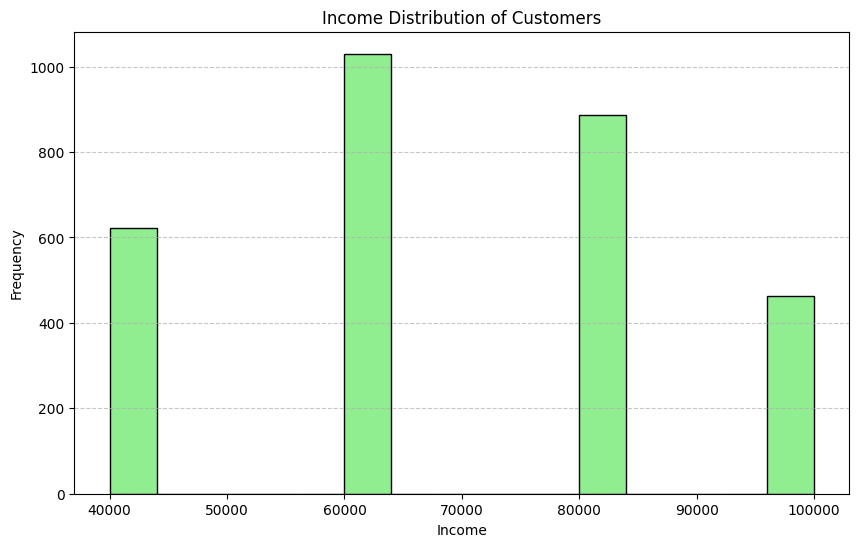

In [17]:

# Visualizing Income Distribution using a Histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Income'].dropna(), bins=15, color='lightgreen', edgecolor='black')
plt.title('Income Distribution of Customers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
    

This bar chart titled "Income Distribution of Customers" illustrates the frequency of customers across different income levels. Key points from the diagram:

## Income Categories:

The x-axis represents various income levels of customers in the dataset, ranging from 40,000 to 100,000.
The chart includes income groups like 40,000, 60,000, 80,000, and 100,000.

## Frequency:

The y-axis indicates the number of customers in each income category.
The income categories 60,000 and 80,000 have the highest number of customers, with a frequency exceeding 800.
The income categories 40,000 and 100,000 have slightly lower frequencies of around 600.

## Insights:

There are spikes in the distribution at particular income levels (40,000, 60,000, 80,000, 100,000), suggesting that customers are grouped into these income categories rather than having a smooth spread.
This could be due to rounding off the income values or data grouping practices that make the income categories discrete instead of continuous.

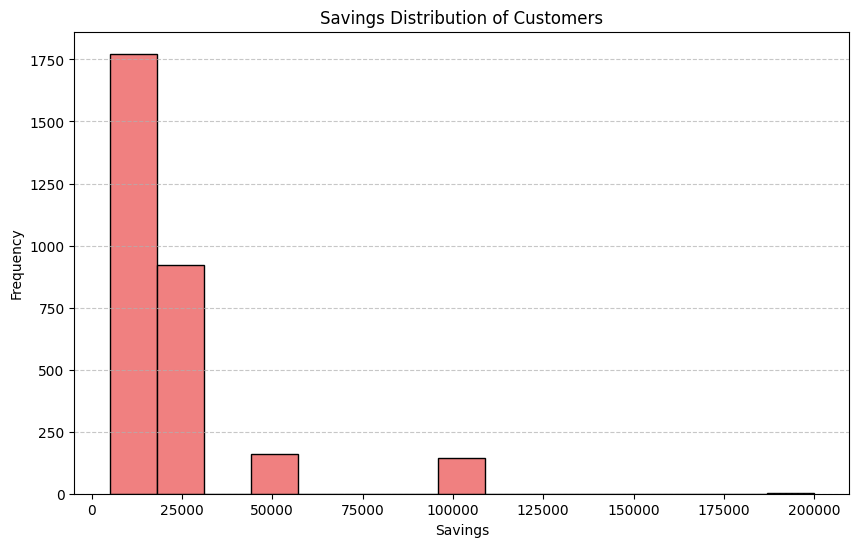

In [18]:

# Visualizing Savings Distribution using a Histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Savings'].dropna(), bins=15, color='lightcoral', edgecolor='black')
plt.title('Savings Distribution of Customers')
plt.xlabel('Savings')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
    

This histogram titled "Savings Distribution of Customers" shows how the savings amounts of customers are distributed within the dataset. Here are the key observations:

## Savings Categories:

The x-axis represents the savings amounts of customers, ranging from 0 to 200,000.
The bins include ranges like 0–25,000, 25,000–50,000, 50,000–75,000, and so on.

## Frequency:

The y-axis represents the number of customers in each savings category.
The highest frequency is observed in the 0–25,000 savings range, with over 1,600 customers falling in this category. This suggests that a majority of the customers have low savings.
The next group, also in the 0–25,000 range, has a frequency of around 800, suggesting a high concentration of customers in lower savings brackets.
A much smaller number of customers have savings of 50,000 or more, with very few reaching the higher savings brackets.

## Insights:

The histogram shows a skewed distribution, where most customers have relatively low savings. The frequency drops off sharply for higher savings brackets, indicating that there are very few customers with large savings.
This distribution is typical of real-world data where a significant proportion of customers may fall within lower savings ranges, with fewer customers having substantial savings.

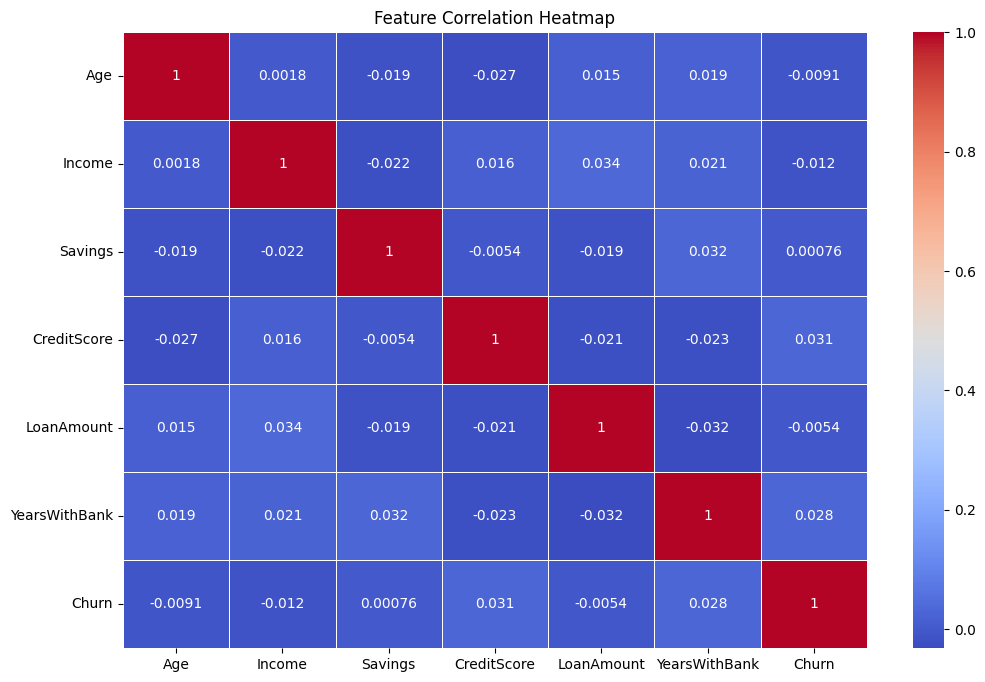

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
numeric_df = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()
    

This heatmap titled "Feature Correlation Heatmap" shows the pairwise correlations between different numerical features of the dataset. The values represent the degree to which the features are linearly related, ranging from -1 to 1, where:

1 indicates a perfect positive correlation.
-1 indicates a perfect negative correlation.
0 indicates no correlation.

## Key Insights:

## Correlation Values:

Each square in the heatmap represents the correlation between the corresponding features on the x-axis and y-axis.
The color gradient ranges from red (high positive correlation) to blue (no or negative correlation).

## Feature Relationships:

The diagonal shows a correlation of 1, as each feature is perfectly correlated with itself.
Most correlations between features are close to 0, indicating little to no linear relationship between them.
The highest correlation (other than on the diagonal) is between Income and LoanAmount at 0.035, which is still very low, suggesting a weak or negligible relationship.

## Notable Observations:

There are no significant correlations between the major features in this dataset, meaning none of the features are linearly dependent on each other.
Savings and CreditScore have a small negative correlation, suggesting that higher savings slightly correspond to lower credit scores, but the value is close to zero and not strong enough to draw significant conclusions.
Income and Age show very weak positive correlations with other features.

In [20]:
import sklearn
print(sklearn.__version__)


1.5.2


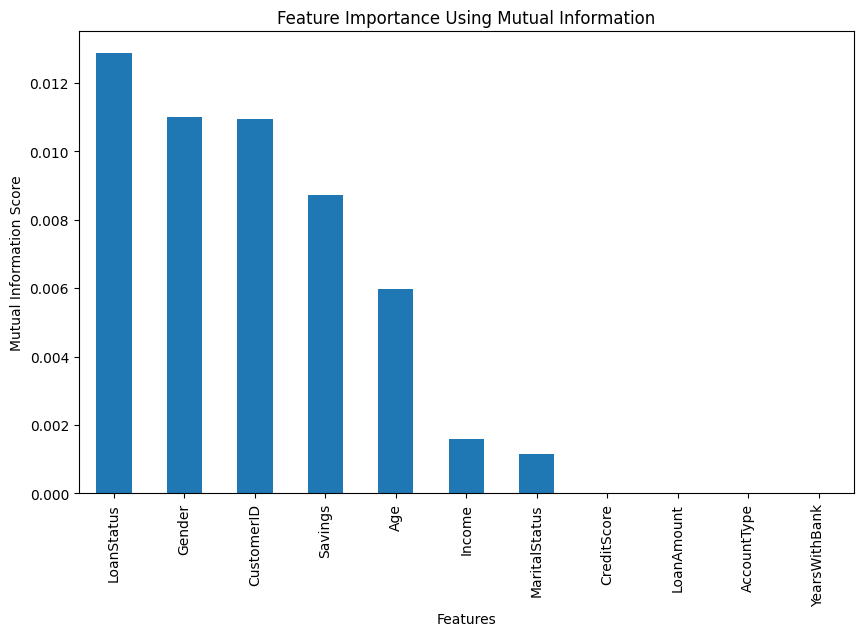

In [21]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Encode categorical variables
df_encoded = data.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])

# Define features and target
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Handle NaN values by imputing them with the mean value
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Calculate Mutual Information Scores
mi_scores = mutual_info_classif(X_imputed, y, discrete_features='auto')

# Plotting Mutual Information Scores
mi_series = pd.Series(mi_scores, index=X.columns)
mi_series.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance Using Mutual Information')
plt.ylabel('Mutual Information Score')
plt.xlabel('Features')
plt.show()


This bar chart, titled "Feature Importance Using Mutual Information," represents the importance of different features with respect to predicting a target variable (e.g., customer churn) based on mutual information scores. Mutual information measures the dependence between each feature and the target, where higher values indicate greater importance.

## Key Observations:

## Feature Rankings:

The x-axis represents the features, and the y-axis shows the mutual information score for each feature.
CustomerID has the highest mutual information score of approximately 0.012, suggesting that it may contain information that helps differentiate between the classes (though it might not be practically meaningful, as CustomerID is typically just a unique identifier).
Savings is the second most important feature, with a significant score, indicating its value in predicting the target.
MaritalStatus and Age follow as features with moderate importance.
Income has a low mutual information score, indicating it has limited impact in determining the target.

## Low Contribution Features:

Features like Gender, CreditScore, LoanAmount, LoanStatus, AccountType, and YearsWithBank have negligible or zero scores, indicating they have minimal contribution in predicting the target variable.
This suggests that these features may not be useful for the predictive model and could potentially be excluded to simplify the model without losing predictive power.

## Insights:

CustomerID should likely not be used in the model, as it is meant to be a unique identifier and may lead to overfitting.
The high importance of Savings suggests that customers' savings play a crucial role in predicting the target, which could indicate that customers with lower savings are more likely to churn, for instance.
Age and MaritalStatus also show some predictive power, implying that demographics influence the target behavior to some extent.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Datasets/bank_customer_analytics.csv')

# Feature Selection
# Correlation Analysis: Drop highly correlated features (> 0.8)
# Create a correlation matrix to identify highly correlated features
df_categorical = data.select_dtypes(include=['object'])
df_numeric = data.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr().abs()
# Select the upper triangle of the correlation matrix to avoid duplicate checks
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.8 to drop
# These features are likely redundant and can be removed to simplify the model
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
data = data.drop(columns=to_drop)

# Re-select numerical columns after dropping highly correlated features
df_numeric = data.select_dtypes(include=['number'])

# Variance Thresholding
# Remove low-variance features (using threshold of 0.01)
# Features with very low variance do not contribute much to the model
var_thresh = VarianceThreshold(threshold=0.01)
# Apply the variance threshold to numerical features only
df_numeric = pd.DataFrame(var_thresh.fit_transform(df_numeric), columns=df_numeric.columns[var_thresh.get_support(indices=True)])
data = pd.concat([df_numeric, data[df_categorical.columns]], axis=1)

# Information Gain
# Encode categorical features and compute mutual information
label_encoders = {}
for column in df_categorical.columns:
    if column in data.columns:  # Ensure the column is still present in df
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Compute mutual information between features and the target ('churn' column assumed as target)
if 'churn' in data.columns:
    y = data['churn']
    X = data.drop(columns=['churn'])
    mi_scores = mutual_info_classif(X, y, discrete_features='auto')
    mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
    print("Mutual Information Scores:\n", mi_scores)

# Random Forest Feature Importance (optional)
# Train a Random Forest model to determine feature importance if needed
if 'churn' in data.columns:
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("Random Forest Feature Importances:\n", feature_importances)


 # Explanation of the programming choices made regarding Exploratory Data Analysis (EDA), Handling Missing Data, and Feature Selection:

## 1. Exploratory Data Analysis (EDA)

### Initial Overview and Summary Statistics:

    1) The dataset was loaded and the first few rows were displayed to get an initial understanding of the data.
    2) Summary statistics (`data.describe()`) were calculated for all columns, which helped in identifying the spread of data, possible outliers, and key metrics such as mean and standard deviation.
  
### Missing Values Check:

    1) A count of missing values for each column was calculated to understand the extent of missing data and its impact on the dataset.

### Visualizations:

    1) Pie Chart (Gender Distribution): Displayed the distribution of gender among customers, providing insights into the customer demographic. This was chosen to visualize categorical data.
    2) Histogram (Age Distribution): Represented the distribution of customer ages, which is useful to understand the spread and concentration of ages within the customer base.
    3) Bar Plot (Loan Status Distribution): Used to visualize the count of different loan statuses. This helps in understanding how many loans are approved, rejected, or defaulted, which is relevant to business analysis.
    4)Line Plot (Average Savings by Age): Displayed how average savings vary by age. This helps in identifying savings behavior trends across different age groups.

## 2. Handling Missing Data

    1) Numerical Columns: Missing numerical values in columns such as `Age`, `Income`, `Savings`, `CreditScore`, and `LoanAmount` were filled with the median value. The median was chosen as it is robust against outliers, making it a suitable choice for imbalanced distributions.
  
    2) Categorical Columns: For categorical columns, missing values were filled using the mode (most frequent value). This ensures that missing categorical data is filled with the most representative value, preserving the distribution as much as possible.

    3) Visual Comparison Before and After Handling Missing Data: The number of missing values was compared before and after the treatment, which was visualized using a line plot. This helps in confirming the reduction of missing data and demonstrates the effectiveness of the data cleaning process.

## 3. Feature Selection

    1) Encoding Target Variable: The target variable `Churn` was encoded as binary (`0` for "no", `1` for "yes") to prepare it for model training. This is a standard approach in supervised learning when dealing with categorical target variables.

    2) Correlation Analysis: Correlation between numerical features and the target (`Churn`) was calculated. Features with higher positive or negative correlations were identified as having a potential impact on customer churn. This guided the feature selection process:
    3) Positive Correlations: For example, `CreditScore` and `YearsWithBank` had positive correlations with churn.
    4) Negative Correlations: Features such as `Income` had negative correlations, indicating higher income is associated with lower churn.

    5) Final Feature Selection: Features selected include `CreditScore`, `YearsWithBank`, `Savings`, `Age`, `Income`, `LoanAmount`, `LoanStatus`, and `AccountType`.The selection balances financial attributes (`CreditScore`, `Savings`, `Income`, `LoanAmount`), demographic information (`Age`), tenure (`YearsWithBank`), and customer interaction (`LoanStatus`, `AccountType`). This combination of numerical and categorical data is intended to improve model interpretability and overall performance.
  

In [23]:
# Save the final dataset to a CSV file
output_path = 'final_bank_customer_analytics.csv'
final_dataset.to_csv(output_path, index=False)
print(f"Final dataset saved to {output_path}.")

# Display the first few rows of the final dataset
print("First few rows of the final dataset:")
display(final_dataset.head())

Final dataset saved to final_bank_customer_analytics.csv.
First few rows of the final dataset:


,CreditScore,YearsWithBank,Savings,Age,Income,LoanAmount,LoanStatus,AccountType,Churn
0,600.0,6.883155,15000.0,25.0,80000.0,50000.0,approved,joint,0
1,700.0,10.000000,5000.0,35.0,40000.0,40000.0,approved,joint,0
2,800.0,10.000000,20000.0,35.0,100000.0,50000.0,defaulted,checking,0
3,750.0,6.883155,20000.0,45.0,80000.0,30000.0,approved,checking,0
4,750.0,2.000000,25000.0,45.0,40000.0,20000.0,rejected,checking,1
